In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# 1. Veri Setini Yükleme

In [5]:
data = pd.read_parquet('/kaggle/input/turkiye-is-bankasi-ml-challenge-5/train_final.parquet')

In [6]:
data.head()

,id,month,n_seconds_1,n_seconds_2,n_seconds_3,carrier,devicebrand,feature_0,feature_1,feature_2,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,5beefd4d2bf4a4767e0df8108,10,5245.571,981.182,205.948,VODAFONE TR,Apple,-1.197737,1.113360,-1.123334,...,-2.613336,-2.032903,2.645719,-1.023478,1.658986,-1.559406,-2.161336,30,58,"menu2, menu4, menu5"
1,867285b116c063d5a8482f5be,10,5184.876,557.650,487.587,TURKCELL,samsung,-2.336352,2.567766,-0.494908,...,-0.983938,-1.453756,-0.021547,-0.195770,2.775513,-0.318980,-4.291473,21,45,"menu7, menu8, menu4"
2,c82a7cbd2e00d9b66c06bcadc,10,3835.618,3275.128,43.806,TURK TELEKOM,Redmi,-2.561455,2.061736,-0.184511,...,-1.668703,-3.599403,1.673868,0.631790,1.293131,-2.230909,-2.383524,19,61,"menu2, menu8, menu4"
3,f2d2b25073ccc298eced86897,10,3532.544,154.509,64.724,TURKCELL,samsung,-2.529918,3.358050,-0.851366,...,-1.861418,-1.219658,1.863495,0.213170,1.029710,-1.142185,-4.466191,2,41,"menu6, menu2, menu1"
4,7818c92a58af0f2cb7c361738,10,3344.192,787.896,715.115,VODAFONE TR,samsung,-2.922361,2.096124,0.060796,...,-0.142903,-1.875545,1.024499,-0.186423,-0.061626,-1.462175,-2.371206,23,85,"menu6, menu2, menu8"


# 2. Bazı İstatistiki Bilgiler

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94049 entries, 0 to 94048
Data columns (total 58 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           94049 non-null  object 
 1   month        94049 non-null  int64  
 2   n_seconds_1  94049 non-null  float64
 3   n_seconds_2  94049 non-null  float64
 4   n_seconds_3  94049 non-null  float64
 5   carrier      94049 non-null  object 
 6   devicebrand  94049 non-null  object 
 7   feature_0    94049 non-null  float64
 8   feature_1    94049 non-null  float64
 9   feature_2    94049 non-null  float64
 10  feature_3    94049 non-null  float64
 11  feature_4    94049 non-null  float64
 12  feature_5    94049 non-null  float64
 13  feature_6    94049 non-null  float64
 14  feature_7    94049 non-null  float64
 15  feature_8    94049 non-null  float64
 16  feature_9    94049 non-null  float64
 17  feature_10   94049 non-null  float64
 18  feature_11   94049 non-null  float64
 19  feat

# 3. Sayısal Sütunlar İçin İstatistiki Bilgiler

In [8]:
summary_statistics = data.describe()

summary_statistics

,month,n_seconds_1,n_seconds_2,n_seconds_3,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
count,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,...,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000
mean,11.311561,432.781818,197.904016,102.381759,-1.824932,1.948002,-0.014231,-0.270988,3.428983,2.314612,...,1.055930,-1.247314,-1.863433,1.042226,0.260601,0.737817,-0.683078,-2.333848,20.531978,50.843943
std,0.732301,429.834018,169.474603,80.533643,0.706014,0.742521,0.855615,1.001878,0.886168,0.765429,...,0.745859,0.767093,0.812613,0.910212,0.797621,0.837250,0.858325,0.642435,8.310330,12.950021
min,10.000000,41.850000,40.231000,40.001000,-5.009604,-1.190684,-4.988702,-4.205721,-2.057158,-1.572397,...,-3.565546,-4.956211,-6.151754,-3.265827,-3.735571,-3.631153,-4.166801,-5.680349,1.000000,20.000000
25%,11.000000,181.540000,91.886000,53.746000,-2.290048,1.443627,-0.560076,-0.950880,2.891524,1.805311,...,0.587355,-1.736227,-2.396253,0.431905,-0.252991,0.161747,-1.279131,-2.753271,15.000000,41.000000
50%,11.000000,306.947000,144.874000,75.415000,-1.840876,1.934019,0.005703,-0.337732,3.503459,2.316267,...,1.093342,-1.219592,-1.865288,1.037332,0.285148,0.703326,-0.703813,-2.327645,21.000000,50.000000
75%,12.000000,537.064000,241.504000,119.032000,-1.379623,2.431059,0.559322,0.330430,4.050990,2.825116,...,1.565953,-0.732870,-1.333491,1.648791,0.798862,1.276491,-0.112671,-1.909460,26.000000,60.000000
max,12.000000,13567.046000,3275.128000,1476.077000,2.137354,6.574112,4.055067,5.021944,6.272530,5.775909,...,3.869422,2.830491,3.225738,5.322931,3.825793,5.147134,3.483374,1.401900,68.000000,102.000000


* Ay değişkeni 10 ila 12 arasında değişiyor; bu, veri kümesinin Ekim, Kasım ve Aralık aylarını kapsadığını gösterir.
* n_seconds_1, n_seconds_2 ve n_seconds_3 sütunları, farklı ortalamalara ve standart sapmalara sahip geniş bir değer aralığına sahip.
* feature_0'dan feature_47'ye kadar olan sütunlar, farklı veri dağılımlarını gösteren farklı ortalamalara ve standart sapmalara sahip.
* feature_48 ve feature_49 sütunları, diğer özellik sütunlarına kıyasla farklı değer aralığına sahip tamsayı değişkenler.

# 4. Eksik Değer Kontrolü

In [9]:
# Checking for missing or null values in the dataset
missing_values = data.isnull().sum()

# Finding columns with missing values (if any)
columns_with_missing_values = missing_values[missing_values > 0]

columns_with_missing_values


Series([], dtype: int64)

***Veri kümesinde herhangi bir eksik veya boş değer bulunmuyor.***

# 5. Nümerik Sütunlar İçin Histogramlar

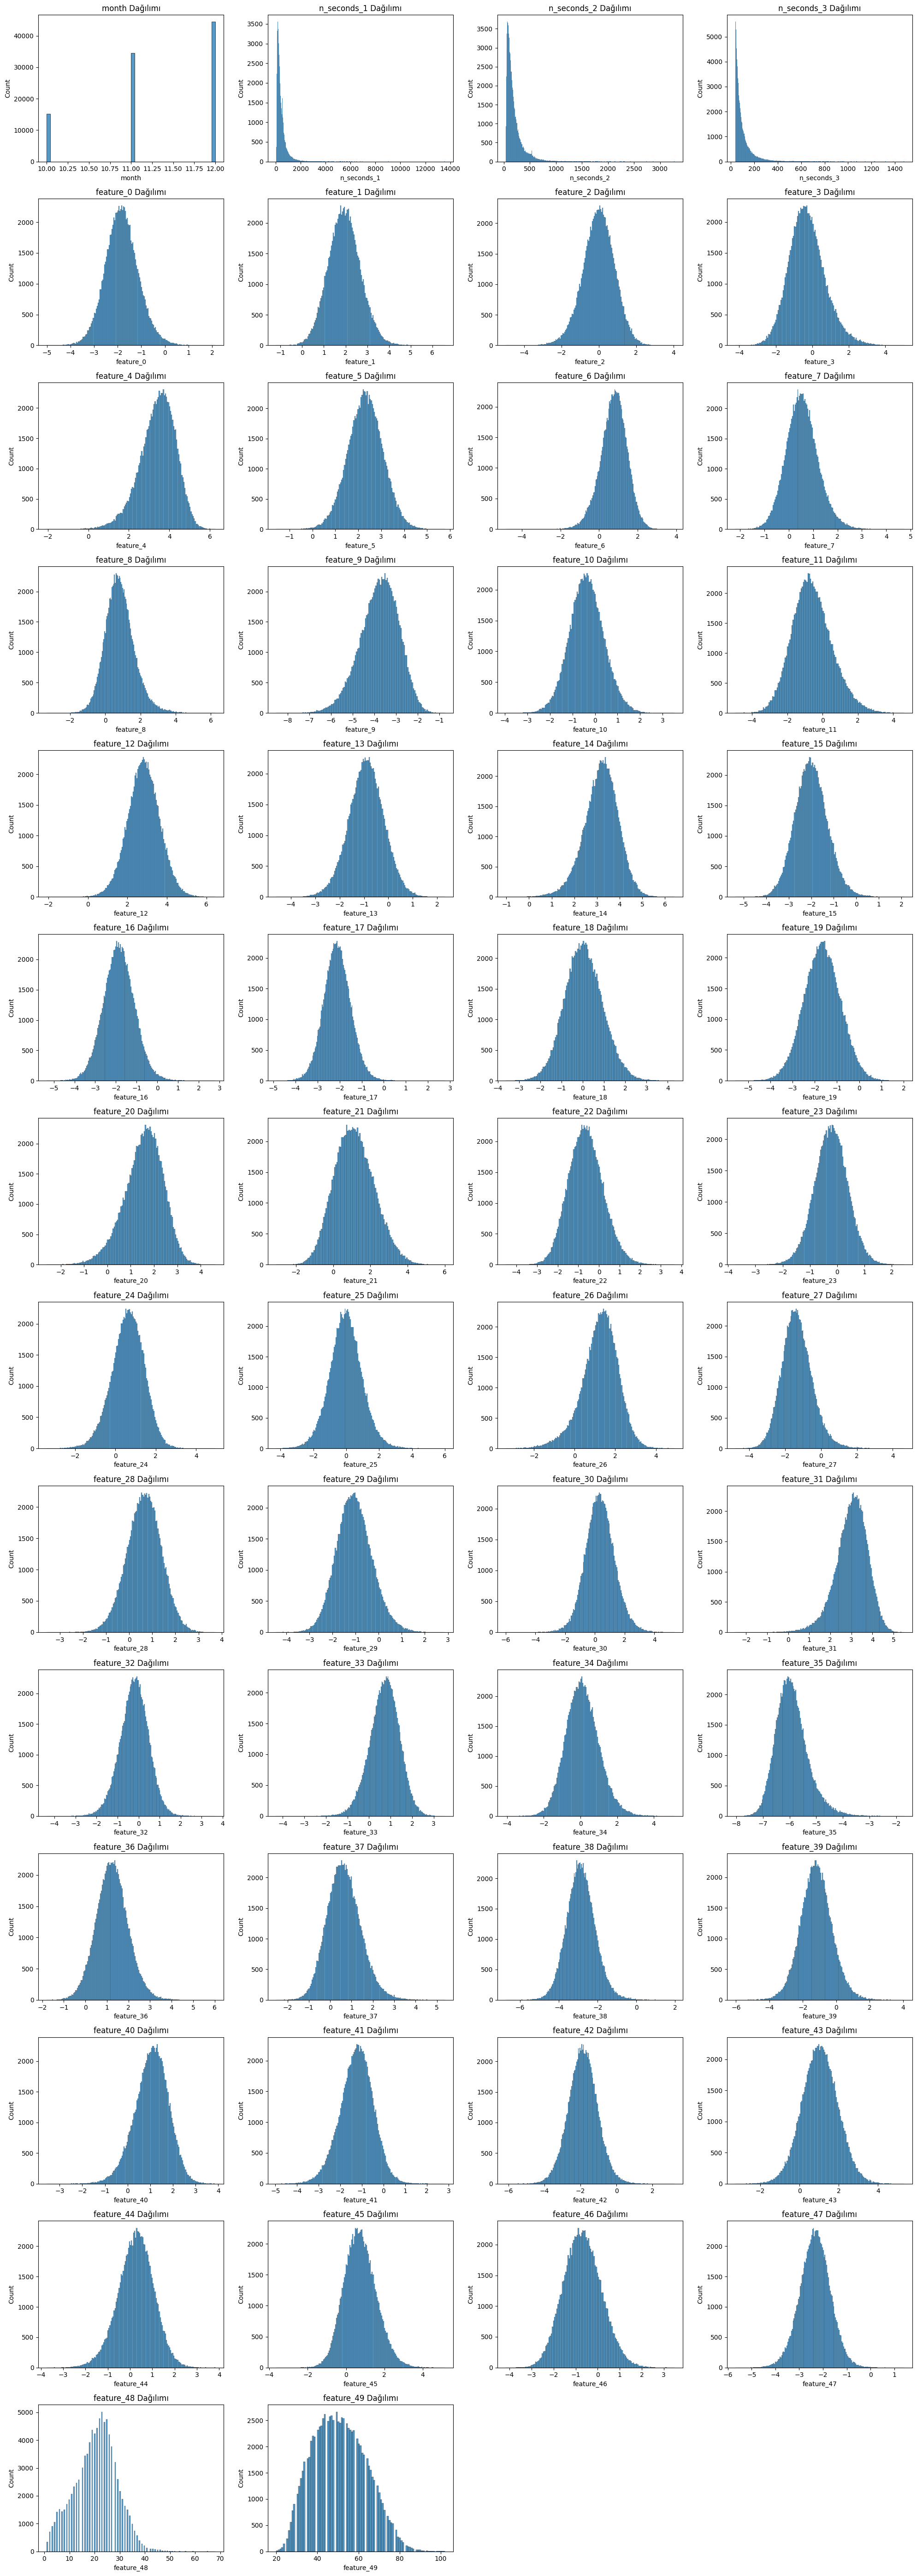

In [11]:
# Extracting all numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Calculating the number of rows and columns for the grid
n_cols = 4  # 4 columns in the grid
n_rows = len(numerical_columns) // n_cols + (1 if len(numerical_columns) % n_cols > 0 else 0)  # Calculating the number of rows

# Creating histograms for all numerical columns
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))

for i, column in enumerate(numerical_columns):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(data[column], kde=False, ax=axs[row, col])
    axs[row, col].set_title(f'{column} Dağılımı')

# Removing empty subplots (if any)
for i in range(len(numerical_columns), n_rows * n_cols):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.show()


* feature_x sütunlarının çoğu normal veya normale yakın bir dağılıma sahip gibi görünürken diğerleri çarpıklık sergiliyor.
* n_seconds_1, n_seconds_2 ve n_seconds_3 değişkenleri özellikle sağa çarpık olarak görülüyor.
* feature_48 ve feature_49, birden fazla tepe noktasına sahip uniform bir dağılım gösteriyor.
* Ay değişkeni, veri kümesindeki üç aya karşılık gelen üç farklı zirveye sahip.

# 6. Nümerik Sütunlar İçin Kutu Grafikleri

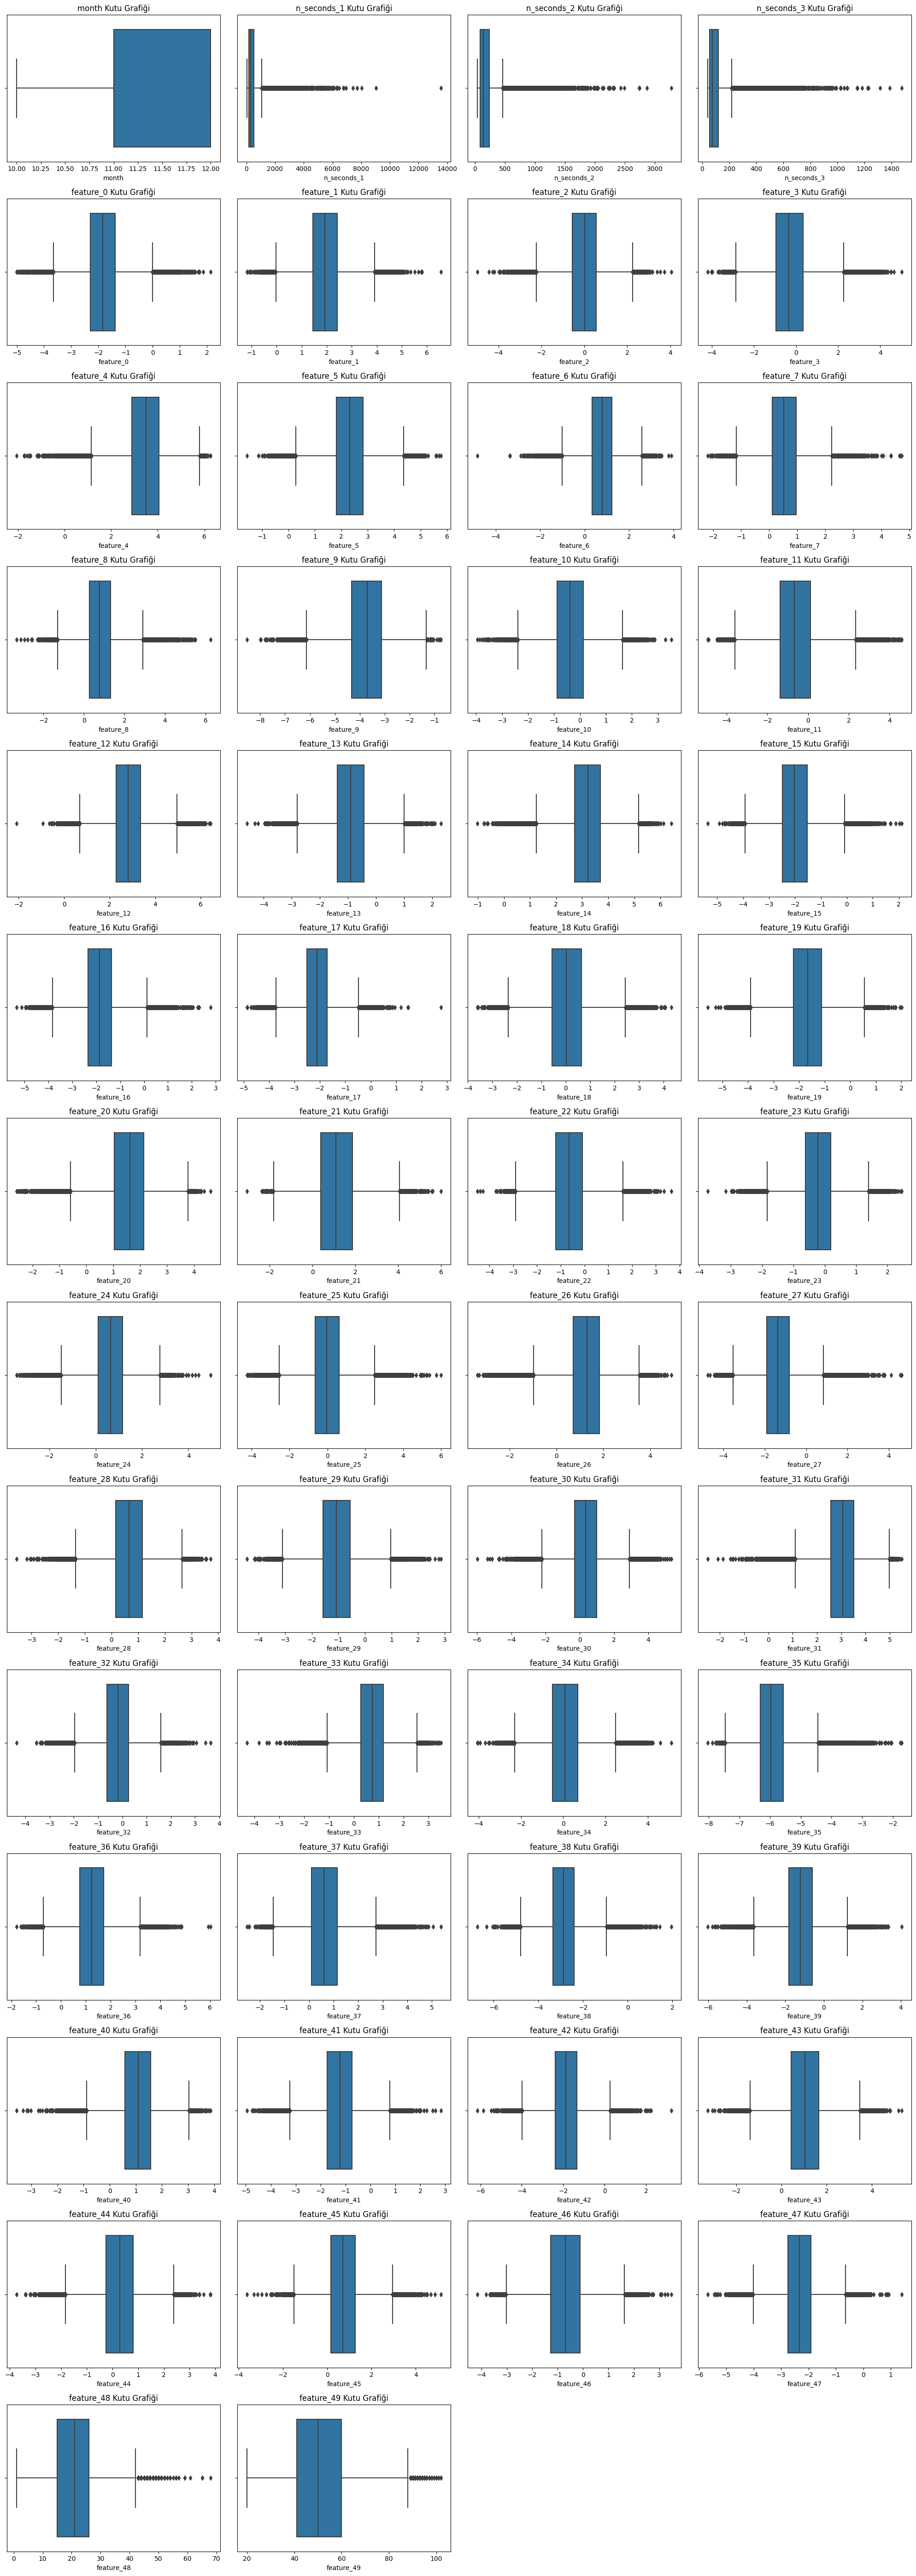

In [12]:
# Creating boxplots for all numerical columns
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))

for i, column in enumerate(numerical_columns):
    row = i // n_cols
    col = i % n_cols
    sns.boxplot(x=data[column], ax=axs[row, col])
    axs[row, col].set_title(f'{column} Kutu Grafiği')

# Removing empty subplots (if any)
for i in range(len(numerical_columns), n_rows * n_cols):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.show()


* Pek çok feature, değer aralığının bir ucunda veya her iki ucunda aykırı değerler (outlier) sergiler.
* n_seconds_1, n_seconds_2 ve n_seconds_3 değişkenleri üst uçta önemli sayıda aykırı değere sahiptir.
* Ay değişkeni kategorik olduğundan beklendiği gibi üç farklı değer gösterir.

# 7. Kategorik Değişkenlerin Analizi

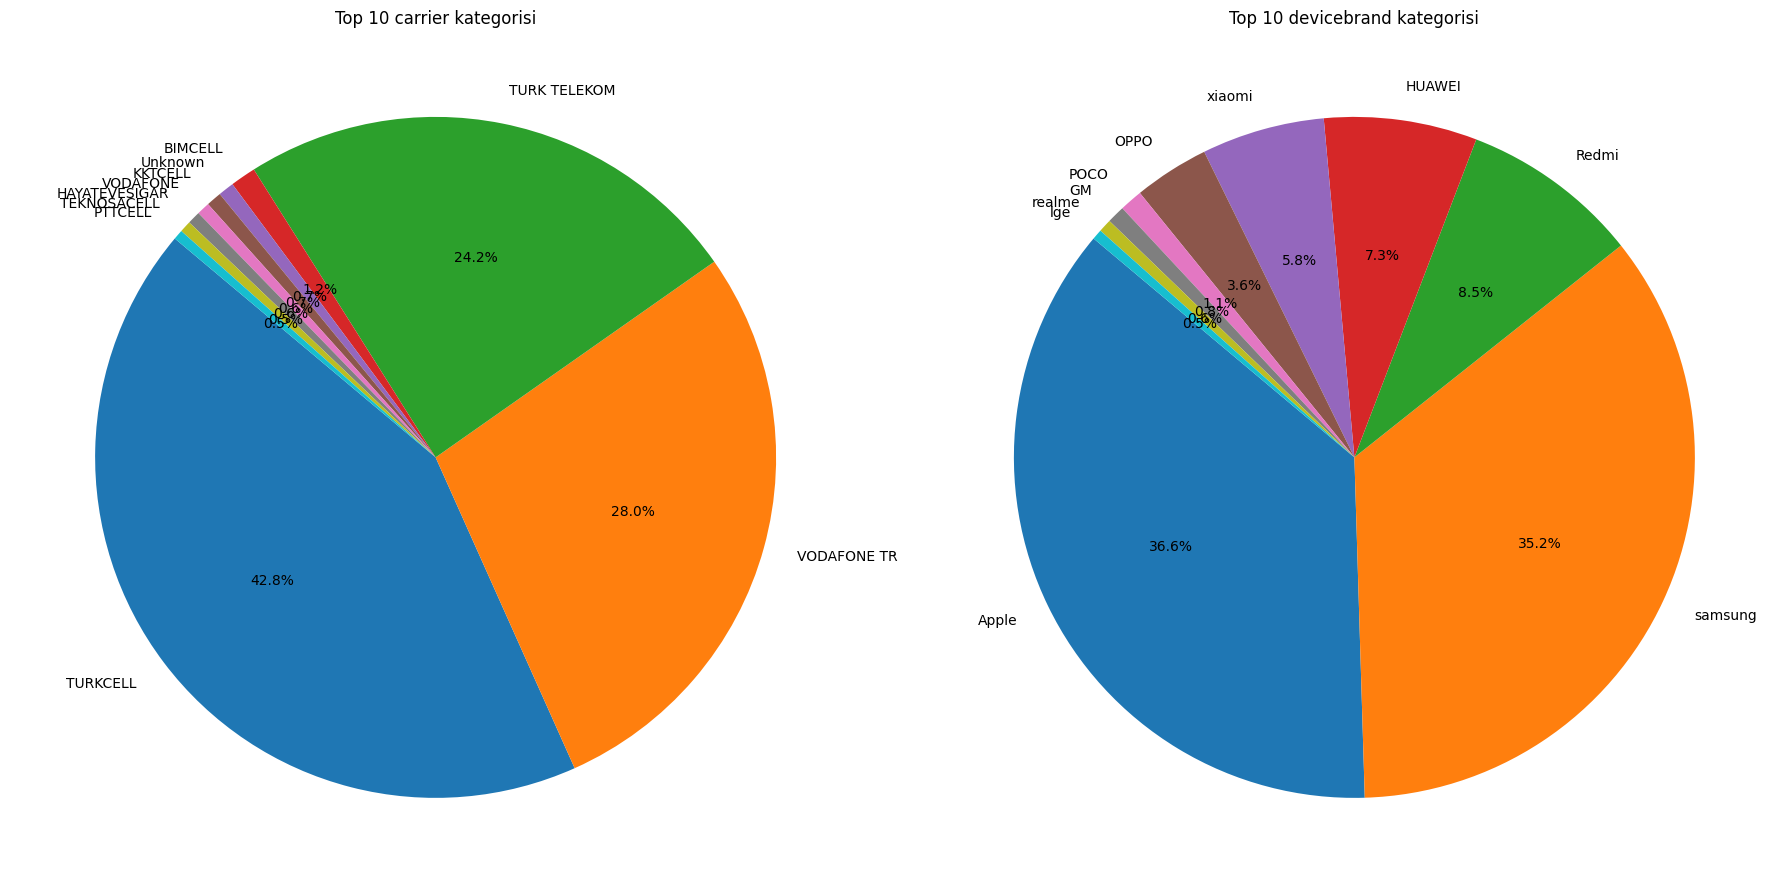

In [13]:
categorical_columns = ['carrier', 'devicebrand']

# Selecting the top 10 most occurring categories from 'carrier' and 'devicebrand' columns
top_n = 10

fig, axs = plt.subplots(1, 2, figsize=(18, 9))

for i, column in enumerate(categorical_columns):
    value_counts = data[column].value_counts().nlargest(top_n)
    axs[i].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
    axs[i].set_title(f'Top {top_n} {column} kategorisi')

plt.tight_layout()
plt.show()


# 8. Hedef Değişkeni Analizi

In [14]:
# Splitting the values in the 'target' column and counting the occurrence of each unique value
target_counts = Counter(','.join(data['target']).split(','))

# Converting the Counter object to a DataFrame for easier visualization
target_counts_df = pd.DataFrame.from_dict(target_counts, orient='index', columns=['count']).reset_index()
target_counts_df.columns = ['target', 'count']
target_counts_df = target_counts_df.sort_values(by='count', ascending=False)

# Displaying the top 10 most occurring targets
top_10_targets = target_counts_df.head(10)
top_10_targets

,target,count
6,menu2,60669
5,menu6,59439
1,menu4,38713
4,menu8,28889
7,menu1,22242
2,menu5,18868
9,menu9,15906
0,menu2,13943
8,menu9,7520
11,menu6,5558


In [15]:
# Extracting unique values from the 'target' column
unique_target_values = set(','.join(data['target']).split(','))

# Cleaning the target values by stripping leading and trailing whitespaces
cleaned_target_values = {value.strip() for value in unique_target_values}

# Checking for any changes in the data
changes_in_data = len(unique_target_values) != len(cleaned_target_values), unique_target_values - cleaned_target_values

changes_in_data


(True,
 {' menu1',
  ' menu2',
  ' menu3',
  ' menu4',
  ' menu5',
  ' menu6',
  ' menu7',
  ' menu8',
  ' menu9'})

In [16]:
# Cleaning the 'target' column data by removing leading and trailing whitespaces
data['target_cleaned'] = data['target'].apply(lambda x: ','.join([value.strip() for value in x.split(',')]))

# Recounting the occurrence of each unique target label
cleaned_target_counts = Counter(','.join(data['target_cleaned']).split(','))

# Converting the Counter object to a DataFrame for easier visualization
cleaned_target_counts_df = pd.DataFrame.from_dict(cleaned_target_counts, orient='index', columns=['count']).reset_index()
cleaned_target_counts_df.columns = ['target', 'count']
cleaned_target_counts_df = cleaned_target_counts_df.sort_values(by='count', ascending=False)

# Displaying the top 10 most occurring cleaned targets
top_10_cleaned_targets = cleaned_target_counts_df.head(10)
top_10_cleaned_targets


,target,count
0,menu2,74612
5,menu6,64997
1,menu4,38818
4,menu8,29256
7,menu9,23426
6,menu1,22353
2,menu5,18904
8,menu3,5649
3,menu7,4132


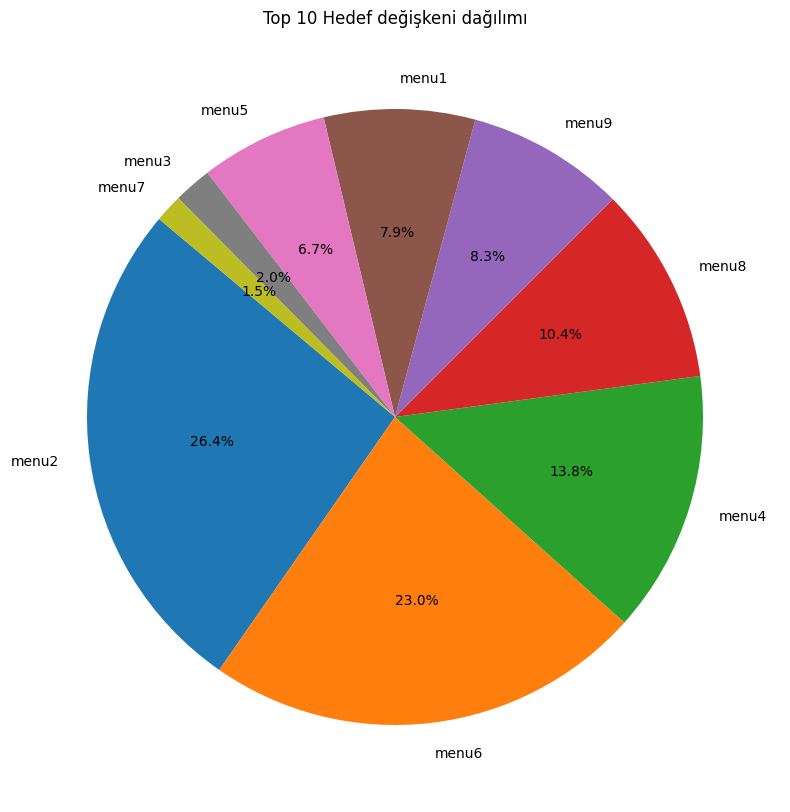

In [17]:
# Visualizing the distribution of the top 10 most occurring cleaned targets using a pie chart
plt.figure(figsize=(10, 10))
plt.pie(top_10_cleaned_targets['count'], labels=top_10_cleaned_targets['target'], autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Hedef değişkeni dağılımı')
plt.show()


# 9. Cihaz Markası ve Operatör Markası İlişkisi

<Figure size 1200x800 with 0 Axes>

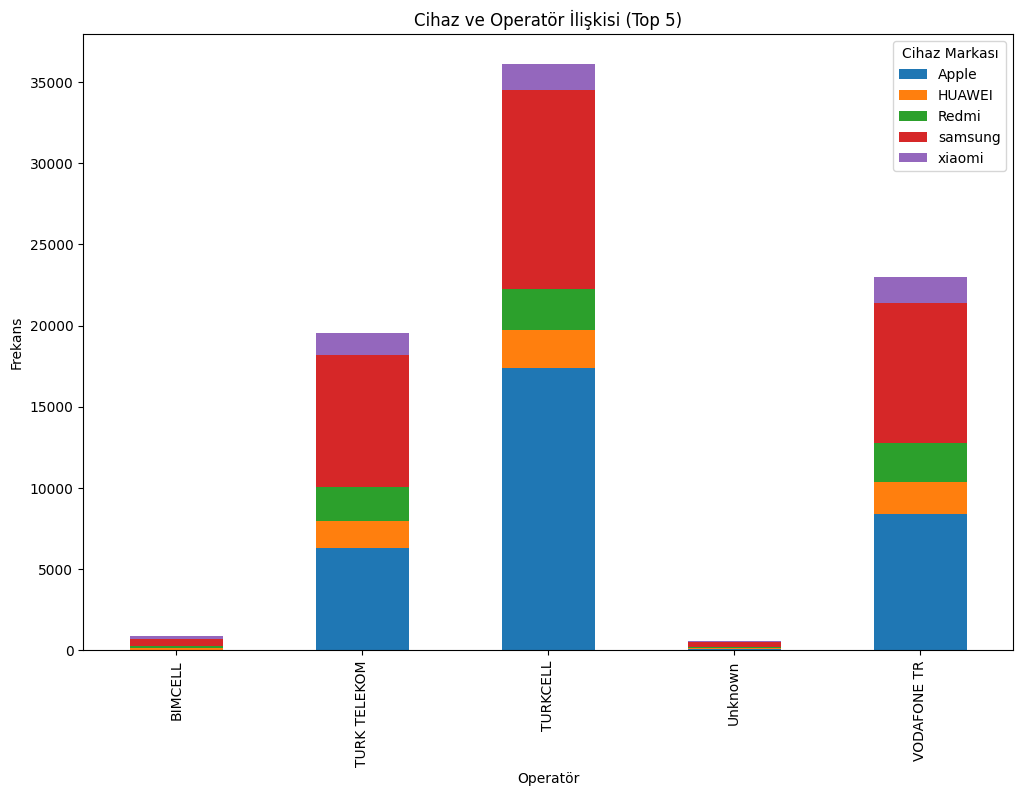

In [18]:
# Creating a cross-tabulation table to show the frequency distribution of 'devicebrand' within each 'carrier'
cross_tab = pd.crosstab(data['carrier'], data['devicebrand'])

# Selecting the top 5 most frequent carriers and device brands
top_5_carriers = data['carrier'].value_counts().head(5).index
top_5_device_brands = data['devicebrand'].value_counts().head(5).index

# Filtering the data to include only the top 5 carriers and device brands
filtered_data = data[data['carrier'].isin(top_5_carriers) & data['devicebrand'].isin(top_5_device_brands)]

# Creating a cross-tabulation table for the filtered data
filtered_cross_tab = pd.crosstab(filtered_data['carrier'], filtered_data['devicebrand'])

# Creating a stacked bar chart for the cross-tabulation table
plt.figure(figsize=(12, 8))
filtered_cross_tab.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Cihaz ve Operatör İlişkisi (Top 5)')
plt.ylabel('Frekans')
plt.xlabel('Operatör')
plt.legend(title='Cihaz Markası')
plt.show()


# 10. Menülerde Geçirilen Sürelerin Analizi

In [19]:
# Splitting the 'target' column into individual menus and associating each menu with the corresponding 'n_seconds' values
menus = []
seconds_1 = []
seconds_2 = []
seconds_3 = []

# Iterating through each row in the dataset
for index, row in data.iterrows():
    targets = row['target_cleaned'].split(',')
    menus.extend(targets)
    seconds_1.extend([row['n_seconds_1']] * len(targets))
    seconds_2.extend([row['n_seconds_2']] * len(targets))
    seconds_3.extend([row['n_seconds_3']] * len(targets))

# Creating a DataFrame to hold the data
menu_seconds_df = pd.DataFrame({'menu': menus, 'n_seconds_1': seconds_1, 'n_seconds_2': seconds_2, 'n_seconds_3': seconds_3})

# Calculating the average time spent on each menu
average_time_per_menu = menu_seconds_df.groupby('menu').mean()

# Displaying the average time spent on each menu
average_time_per_menu.head(10)  # Displaying the first 10 rows for a glimpse of the data


,n_seconds_1,n_seconds_2,n_seconds_3
menu,,,
menu1,417.822730,192.926988,102.087785
menu2,452.523608,205.537616,104.168840
menu3,387.765606,176.016272,92.681224
menu4,375.913294,177.505446,96.026142
menu5,390.092874,181.199639,99.399811
menu6,425.033984,196.669284,102.446989
menu7,388.116426,177.110326,94.960028
menu8,563.201174,239.155123,112.042570
menu9,390.214226,186.475660,101.310521


* Harcanan ortalama süre, tüm menülerde n_seconds_1'den n_seconds_3'e düşme eğiliminde.
* menu8, görüntülenen menüler arasında üç zaman aralığının tamamında harcanan en yüksek ortalama süreye sahip.
* Diğer menüler, üç zaman aralığında harcanan ortalama süreye nispeten benzer.

Tüm menülerde n_saniye cinsinden n_saniye_1'den n_saniye_3'e düşüş çeşitli faktörlerin göstergesi olabilir:

* Kullanıcılar ilk dönemde (n_seconds_1) daha ilgili veya aktif olabilir ve etkileşimleri zaman içinde azalarak sonraki dönemlerde (n_seconds_2 ve n_seconds_3) daha düşük n_seconds değerlerine yol açabilir.

* Kullanıcılar zamanla menülere veya platforma daha aşina hale gelebilir, bu da daha sonraki dönemlerde daha hızlı gezinmeye ve daha az zaman harcanmasına olanak tanır.

In [20]:
!pip install fastparquet
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.8 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.9 MB/s eta 0:00:0000:01


In [21]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from fastparquet import ParquetFile
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, PassiveAggressiveClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/turkiye-is-bankasi-ml-challenge-5/train_final.parquet
/kaggle/input/turkiye-is-bankasi-ml-challenge-5/test_final.parquet
/kaggle/input/turkiye-is-bankasi-ml-challenge-5/submission_sample_final.parquet


In [22]:
pf = ParquetFile("/kaggle/input/turkiye-is-bankasi-ml-challenge-5/train_final.parquet")
pf1 = ParquetFile("/kaggle/input/turkiye-is-bankasi-ml-challenge-5/test_final.parquet")
pf2 = ParquetFile("/kaggle/input/turkiye-is-bankasi-ml-challenge-5/submission_sample_final.parquet")
submit = pf2.to_pandas()
train = pf.to_pandas()
test = pf1.to_pandas()

top_n = 15  

top_carriers = train["carrier"].value_counts().head(top_n).index.tolist()

train["carrier_encoded"] = train["carrier"].apply(lambda x: x if x in top_carriers else "Other")

label_encoder = LabelEncoder()
train["carrier_encoded"] = label_encoder.fit_transform(train["carrier_encoded"])
top_devicebrand = train["devicebrand"].value_counts().head(20).index.tolist()

train["devicebrand_encoded"] = train["devicebrand"].apply(lambda x: x if x in top_devicebrand else "Other")

label_encoder = LabelEncoder()
train["devicebrand_encoded"] = label_encoder.fit_transform(train["devicebrand_encoded"])

train = train.drop(columns=['id'])
train = train.drop(columns=['carrier'])
train = train.drop(columns=['devicebrand'])
train[['Ilk_menu', 'Ikinci_menu', 'Ucuncu_menu']] = train['target'].str.split(',', expand=True)
train = train.drop(columns=['target'])

top_carriers = test["carrier"].value_counts().head(15).index.tolist()

test["carrier_encoded"] = test["carrier"].apply(lambda x: x if x in top_carriers else "Other")

label_encoder = LabelEncoder()
test["carrier_encoded"] = label_encoder.fit_transform(test["carrier_encoded"])

top_carriers = test["devicebrand"].value_counts().head(20).index.tolist()

test["devicebrand_encoded"] = test["devicebrand"].apply(lambda x: x if x in top_carriers else "Other")

label_encoder = LabelEncoder()
test["devicebrand_encoded"] = label_encoder.fit_transform(test["devicebrand_encoded"])

test = test.drop(columns=['id'])
test = test.drop(columns=['carrier'])
test = test.drop(columns=['devicebrand'])

menu_mapping1 = {
    ' menu1': 1,
    ' menu2': 2,
    ' menu3': 3,
    ' menu4': 4,
    ' menu5': 5,
    ' menu6': 6,
    ' menu7': 7,
    ' menu8': 8,
    ' menu9': 9,
}
menu_mapping = {
    'menu1': 1,
    'menu2': 2,
    'menu3': 3,
    'menu4': 4,
    'menu5': 5,
    'menu6': 6,
    'menu7': 7,
    'menu8': 8,
    'menu9': 9,
}
train['Ilk_menu'] = train['Ilk_menu'].replace(menu_mapping)
train['Ikinci_menu'] = train['Ikinci_menu'].replace(menu_mapping1)
train['Ucuncu_menu'] = train['Ucuncu_menu'].replace(menu_mapping1)

In [ ]:
df = train 

X = df.drop(columns=['Ilk_menu', 'Ikinci_menu', 'Ucuncu_menu'])
y = df[['Ilk_menu', 'Ikinci_menu', 'Ucuncu_menu']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=50, random_state=2),
    'SVC': SVC(kernel='sigmoid', gamma=1.0),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(max_depth=5),
    'Logistic Regression': LogisticRegression(solver='liblinear', penalty='l1'),
    'AdaBoost': AdaBoostClassifier(n_estimators=50, random_state=2),
    'Bagging': BaggingClassifier(n_estimators=50, random_state=2),
    'Extra Trees': ExtraTreesClassifier(n_estimators=50, random_state=2),
    'LightGBM': LGBMClassifier(n_estimators=50, random_state=2),
    'Ridge Classifier': RidgeClassifier(),
    'Passive Aggressive': PassiveAggressiveClassifier(),
    'Voting Classifier': VotingClassifier(estimators=[('RF', RandomForestClassifier(n_estimators=50, random_state=2)), ('GBDT', GradientBoostingClassifier(n_estimators=50, random_state=2))], voting='soft'),
    'MLP': MLPClassifier(max_iter=500, random_state=2),
}

def jaccard_similarity_score(y_true, y_pred):
    jaccard_scores = []
    for i in range(len(y_true)):
        intersection = np.sum(np.logical_and(y_true[i], y_pred[i]))
        union = np.sum(np.logical_or(y_true[i], y_pred[i]))
        jaccard_score = intersection / union
        jaccard_scores.append(jaccard_score)
    return np.mean(jaccard_scores)

import numpy as np

def process_predictions(y_pred, y_test):
    y_test = np.array(y_test)

    def to_binary_representation(data):
        joined_array = np.array([', '.join(map(str, row)) for row in data])
        all_menus = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
        binary_rep = [[1 if menu in entry else 0 for menu in all_menus] for entry in joined_array]
        return np.array(binary_rep)

    y_pred_binary = to_binary_representation(y_pred)
    y_test_binary = to_binary_representation(y_test)

    return y_test_binary, y_pred_binary

for name, clf in classifiers.items():
    print(f"Evaluating {name}...")

    model = MultiOutputClassifier(clf)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_true, y_pred = process_predictions(y_pred, y_test.values)

    score = jaccard_similarity_score(y_true, y_pred)
    print(f"Jaccard Score for {name}: {score}")



Evaluating Random Forest...
Jaccard Score for Random Forest: 0.5416764132553606
Evaluating Gradient Boosting...
